# Task4

## Trumpalaikio spektro analizė

Darbą atliko: Modestas Gražys, PS 4k, 5 grupė; 

Data: 2022-10-22

Darbo tikslas: Garso signalų nuskaitymas, trumpalaikio spektro analizė, analizės rezultatų interpretavimas.

## Duomenų nuskaitymas iš failo

Ši celė leidžia pasirinkti norimą audio failą, nuskaito iš jo duomenis ir paruošia apdorojimui. Taip pat pateikia audio įrašo laiko diagramą ir leidžia jo pasiklausyti

File size: 343158 bytes
Length of format data: 16
Type of format: 1, (1 - is PCM)
Number of channels: 1
Mono audio
BytesPerSample x Channels: 2
Byte Rate: 88200
Sample rate: 44100
Bits per sample: 16
Data size: 338688 bytes
Bytes per sample: 2
Total samples in the audio file: 169344
Sound duration: 3.84 s


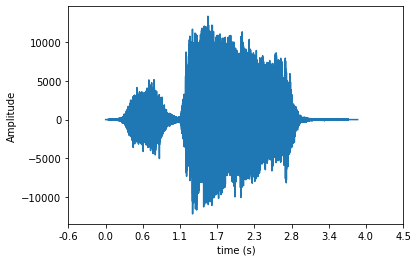


Listen to this sound:



In [1]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

Tk().withdraw()
filename = askopenfilename()
# filename = "/Users/modestasgrazys/Documents/VU/Signal Processing/Samples/Elephant.wav"

header_bytes = []

with open(filename, 'rb') as input_file:
    riff = input_file.read(4)
    file_size = int.from_bytes(input_file.read(4), "little")
    file_type_header_wave = input_file.read(4)
    format_chunk_marker = input_file.read(4)
    length_of_format_data = int.from_bytes(input_file.read(4), "little")
    type_of_format = int.from_bytes(input_file.read(2), "little")
    number_of_channels = int.from_bytes(input_file.read(2), "little")
    sample_rate = int.from_bytes(input_file.read(4), "little")
    byte_rate = int.from_bytes(input_file.read(4), "little")
    bytes_per_sample_channels = int.from_bytes(input_file.read(2), "little")
    bits_per_sample = int.from_bytes(input_file.read(2), "little")
    data_header = input_file.read(4)
    data_size = int.from_bytes(input_file.read(4), "little")
    
    print(f'File size: {file_size} bytes')
    print(f'Length of format data: {length_of_format_data}')
    print(f'Type of format: {type_of_format}, (1 - is PCM)')
    print(f'Number of channels: {number_of_channels}')
    if number_of_channels == 1:
        print(f'Mono audio')
    elif number_of_channels == 2:
        print(f'Stereo audio')
    else:
        raise Exception("This number of channels is unsopported")
    print(f'BytesPerSample x Channels: {bytes_per_sample_channels}')
    print(f'Byte Rate: {byte_rate}')
    print(f'Sample rate: {sample_rate}')
    print(f'Bits per sample: {bits_per_sample}')
    if data_size > file_size:
        data_size = file_size - 8
    print(f'Data size: {data_size} bytes')
    
    sample_in_bytes = input_file.read(data_size)
    
    bytes_per_sample = int(bits_per_sample / 8)

total_samples = int(data_size / (bytes_per_sample * number_of_channels))
sound_duration = total_samples / sample_rate


samples = []

if number_of_channels == 1:
    for i in range(total_samples):
        sample = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        samples.append(sample)
elif number_of_channels == 2:
    for i in range(total_samples*number_of_channels):
        sample1 = int.from_bytes(sample_in_bytes[bytes_per_sample*i:bytes_per_sample*(i+1)], "little", signed=True)
        sample2 = int.from_bytes(sample_in_bytes[bytes_per_sample*(i+2):bytes_per_sample*(i+3)], "little", signed=True)
        samples.append((sample1, sample2))
else:
    raise Exception("More than 2 channel audio files unsupported")


print(f'Bytes per sample: {bytes_per_sample}')
print(f'Total samples in the audio file: {total_samples}')
print(f'Sound duration: {sound_duration} s')

# Set marker position in the sound diagram. Please mind the duration of a sound
# marker_position = 0.7

# marker_position = marker_position * sample_rate

def plot_sound_time_diagram(samples, number_of_channels, starting_point = 0, miliseconds = False, time_values = True):
    if number_of_channels == 1:
        samples = np.array(samples)
        time_axis = np.arange(0, len(samples))
        plt.plot(time_axis, samples)
        # plt.plot(marker_position, 0, marker="P", markersize=15)
    elif number_of_channels == 2:
        channel1_samples = [channel1_sample for (channel1_sample, channel2_sample) in samples]
        channel2_samples = [channel2_sample for (channel1_sample, channel2_sample) in samples]
        time_axis = np.arange(0, len(samples))
        fig, ax = plt.subplots(2, 1, sharex='col', sharey='row')
        ax[0].plot(time_axis, channel1_samples)
        # ax[0].plot(marker_position, 0, marker="P", markersize=15)
        ax[1].plot(time_axis, channel2_samples)
        # ax[1].plot(marker_position, 0, marker="P", markersize=15)
    
    tick_locations, tick_labels = plt.xticks()
    if time_values:
        if miliseconds:
            tick_labels = [round((value + starting_point) / (sample_rate / 1000), 1) for value in tick_locations]
            plt.xlabel('time (ms)')
        else:
            tick_labels = [round((value + starting_point) / sample_rate, 1) for value in tick_locations]
            plt.xlabel('time (s)')
        plt.xticks(ticks=tick_locations, labels=tick_labels)
    else:
        tick_labels = [int(value + starting_point) for value in tick_locations]
        plt.xticks(ticks=tick_locations, labels=tick_labels)
        plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

plot_sound_time_diagram(samples, number_of_channels)
print('\nListen to this sound:\n')
ipd.Audio(filename)

## Signalo atkarpos parinkimas, atvaizdavimas laiko diagrama

Sound diagram of the chosen clip from the audio


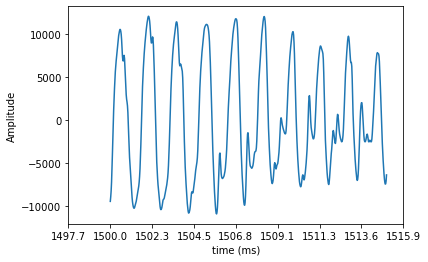

In [2]:
starting_time = 1.5 # in seconds
clip_duration = 15 # in miliseconds

starting_sample = int(sample_rate * starting_time)
num_clip_samples = int(sample_rate * clip_duration / 1000) # dividing from 1000 since it's miliseconds

clip_samples = samples[starting_sample : starting_sample + num_clip_samples] # choice of some clip from the sample

# Ploting the clip in time diagram
print('Sound diagram of the chosen clip from the audio')
plot_sound_time_diagram(clip_samples, number_of_channels, starting_point = starting_sample, miliseconds = True)

## Signalo atkarpos amplitudės spektro funkcija

### Lango funkcijos pritaikymas

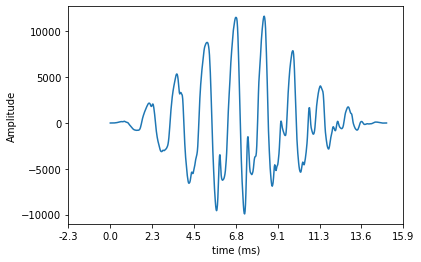

In [3]:
import math

# Applying Hann window
def hann_window_func(x, num_x):
    return math.sin(math.pi * x / num_x) ** 2 # sin^2(pi*n/N)

hann_window = [hann_window_func(x, num_clip_samples) for x in list(range(num_clip_samples))]

if number_of_channels == 1:
    clip_samples = [sample * hann_value for (sample, hann_value) in zip(clip_samples, hann_window)]
elif number_of_channels == 2:
    clip_samples_ch1 = [sample_ch1 for (sample_ch1, sample_ch2) in (sample_ch1, sample_ch2)]
    clip_samples_ch2 = [sample_ch2 for (sample_ch1, sample_ch2) in (sample_ch1, sample_ch2)]
    clip_samples_ch1 = [sample_ch1 * hann_value for (sample_ch1, hann_value) in zip(clip_samples_ch1, hann_value)]
    clip_samples_ch2 = [sample_ch2 * hann_value for (sample_ch2, hann_value) in zip(clip_samples_ch2, hann_value)]
    clip_samples = list(zip(clip_samples_ch1, clip_samples_ch2))
else:
    raise Exception("More than 2 channel audio clips are unsupported")

plot_sound_time_diagram(clip_samples, number_of_channels, miliseconds=True)

### Diskrečioji Furjė transformacija

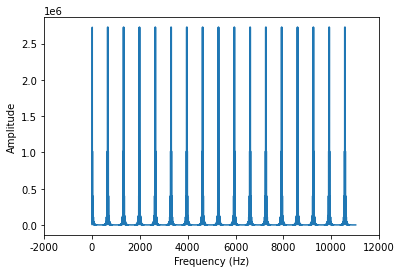

In [26]:
def fourier_transformation_func(k, clip_samples):
    return sum([clip_samples[n] * math.e ** ((-1)*1j*2*math.pi*n*k / len(clip_samples)) for n in range(len(clip_samples))])


starting_frequency = 0
ending_frequency = sample_rate // 2
freq_range = range(starting_frequency, ending_frequency)
freq_domain = [np.abs(fourier_transformation_func(freq, clip_samples)) for freq in freq_range]
# np.abs() - gives absolute value of the number. If z - complex, |z| = np.abs(z), z = |z|* e^(jQ)


if len(freq_domain) % 2 == 0:
    # Even number of values in a frequency domain
    freq_domain = freq_domain[:((len(freq_domain) // 2) + 1)]
    first_value = freq_domain[0]
    last_value = freq_domain[len(freq_domain) - 1]
    freq_domain = [value * 2 for value in freq_domain[1:(len(freq_domain) - 1)]]
    freq_domain = [first_value] + freq_domain + [last_value]
else:
    # Odd number of values in a frequency domain
    freq_domain = freq_domain[:(len(freq_domain + 1) // 2)]
    first_value = freq_domain[0]
    freq_domain = [value * 2 for value in freq_domain[1:len(freq_domain)]]
    freq_domain = [first_value] + freq_domain
"""    
freq_domain = np.abs(np.fft.fft(clip_samples))
num_freq_bins = len(freq_domain)
fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sample_rate)
half_freq_bins = num_freq_bins // 2

fft_freqs = fft_freqs[:half_freq_bins]
freq_domain = freq_domain[:half_freq_bins]
freq_domain = 2 * freq_domain / (len(clip_samples))
freq_domain = freq_domain - np.mean(freq_domain)
"""
plot_sound_time_diagram(freq_domain, number_of_channels, starting_point=starting_frequency, time_values=False)

## Rezultatų aptarimas

Darbas atliktas naudojantis šia interaktyvia aplinka pagal emokymuose išdėstytų punktų eiliškumą:

https://emokymai.vu.lt/pluginfile.php/401768/mod_label/intro/UZD_04.pdf

Garso įrašai apdoroti aukščiau esančiomis programinio kodo celėmis. Dirbau tik su mono įrašais, aplinkos nepritaikiau stereo įrašų analizei. Tačiau galiu pakoreguoti ir pritaikyti celes stereo įrašams. Pagrindinis skirtumas - vietoj vieno grafiko konkrečiam žingsniui tiriant konkretų mono garso įrašą, du grafikai skirtingiems stereo įrašo kanalams.

Taip pat rėmiausi šiais šaltiniais (ta pati medžiaga, tačiau kitos aplinkos):
1. https://makeabilitylab.github.io/physcomp/signals/FrequencyAnalysis/index.html
2. https://github.com/makeabilitylab/signals/blob/master/Tutorials/Signals%20-%20Frequency%20Analysis.ipynb

Tyriau signalus remiantis dažnine analize, taikant diskrečiąją Furjė transformaciją:

Ko tikėjausi: Grafiškos signalo amplitudžių reprezentacijos dažnių spektre tokiu pavidalu - grafikas turi amplitudžių ašį ir dažnių ašį. Jeigu tam tikras dažnis signale egzistuoja, matysime grafike pakilimą rodantį šio konkretaus dažnio amplitudę, pvz jeigu signalas susideda iš 3-ijų sinusoidžių, kurios turi dažnius 100 Hz, 300 Hz ir 500 Hz, tai dažnių ašyje (per visą dažnių spektrą nuo 0 Hz iki (Fs / 2)), matysime grafiko pakilimus ties 100 Hz, 300 Hz ir 500 Hz dažnių reikšmėmis ir viskas. Tik 3 pakylimai.

Ką gavau: Tai ko tikėjausi, tik su tam tikru periodiškumu.

Žemiau pateikiu 3 skirtingų tyrinėtų audio įrašų dažnių diagramas (amplitudžių diagramas dažnio domene)

<table>
    <tr>
        <th>Katės miaukimas</th>
        <th>Operos vokalai (Fm, 129bpm)</th>
        <th>Dramblio garsai</th>
    </tr>
    <tr>
        <td>
            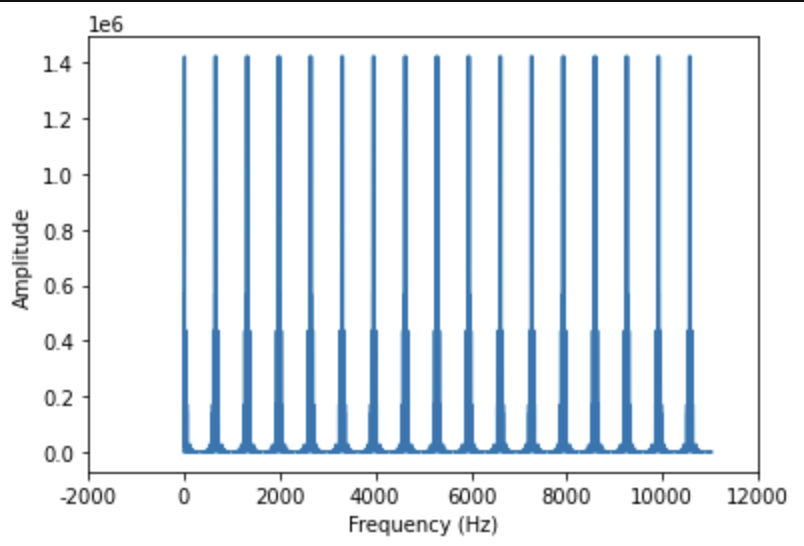
        </td>
        <td>
            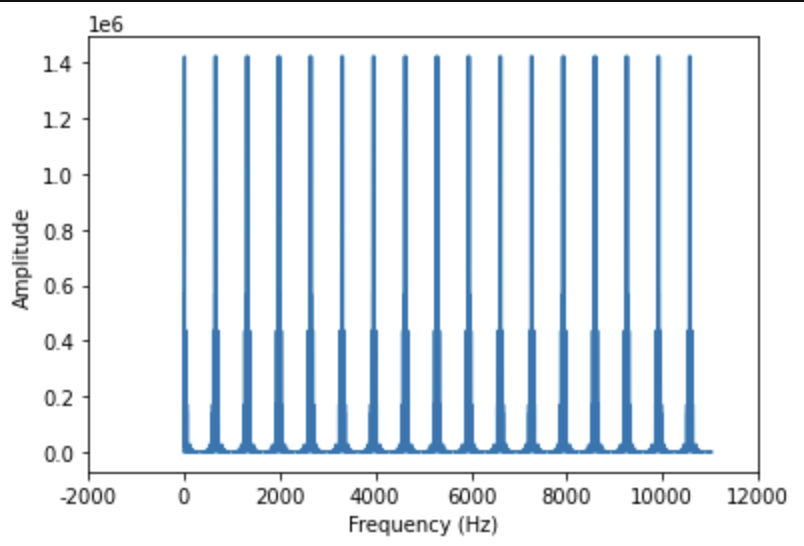
        </td>
        <td>
            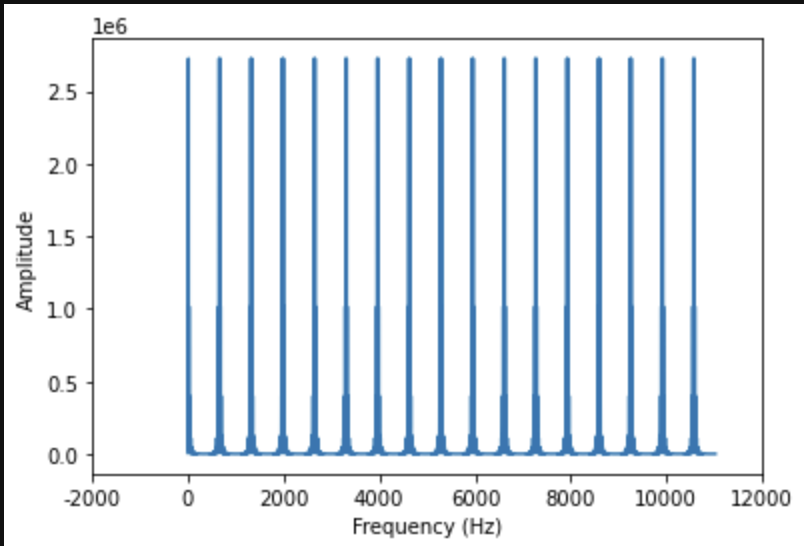
        </td>
    </tr>
    <tr>
        <td>
            pav. 1
        </td>
        <td>
            pav. 2
        </td>
        <td>
            pav. 3
        </td>
    </tr>
</table>

Kiekvienoje diagramoje matomas tam tikras amplitudžių periodiškumas. Kas tam tikrą dažnių intervalą, amplitudės (tiksliau - amplitudžių klasterius), sudarančios garsą, kartojasi - ties skirtingomis dažnio reikšmėmis. Tačiau realius dažnius, kurie pasireiškia kiekviename iš signalų, iš šių grafikų įžiūrėti praktiškai neįmanoma.

Žemiau pateikiu dramblio garso įrašo labiau priartintus dažnio domeno grafikus:

<table>
    <tr>
        <td>
            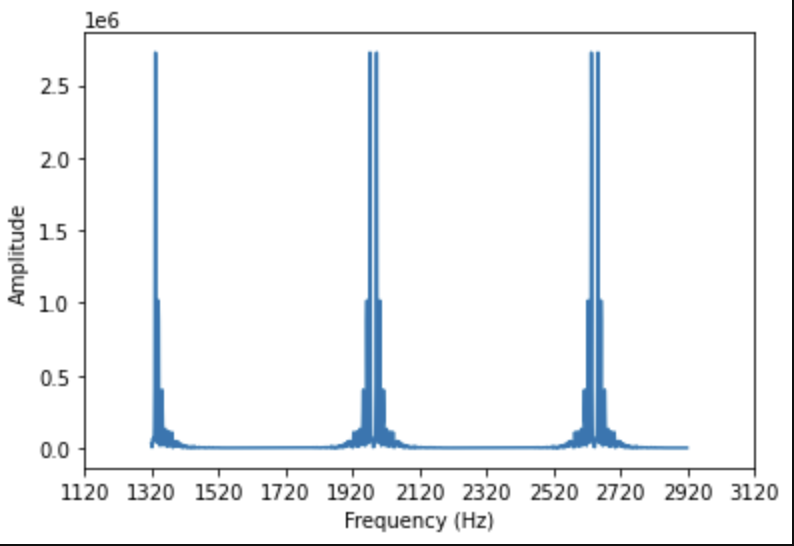
        </td>
        <td>
            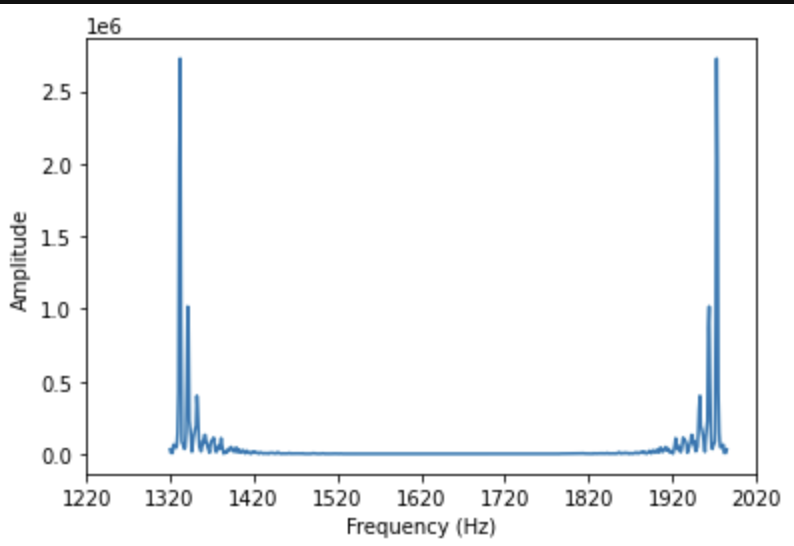
        </td>
    </tr>
    <tr>
        <td>
            pav. 4
        </td>
        <td>
            pav. 5
        </td>
    </tr>
</table>

Iš 4-ojo paveiklėlio galime matyti, kad šis periodiškumas pasireiškia per maždaug 650 Hz šiame audio įraše. Taip pat įdomu, kad grafikas pateikia amplitudžių 'veidrodinį atspindį' (pav. 5), prieš pradėdamas naują periodą.

Spręsdamas šį uždavinį galvojau (ir iki šiol galvoju), kad padariau klaidą ir tokių grafikų gauti neturėčiau. Manau, kad trūksta įdėti tam tikrą tinkamą kompleksinių skaičių apdorojimo mechanizmą, kuris perdirbtų dabartinius rezultatus į realius, t.y. dažnio domeno grafiką, kuris pateiktų tik signalą sudarančių amplitudžių spektrą, be periodiškumo.

Būtent dėl darbo su kompleksiniais skaičiais, manau, šis periodiškumas ir atsiranda. Nors grafikas vaizduoja amplitudes - kompleksinių Furjė transformacijos rezultato skaičių reikšmių modulius, manau, kad man dar reikalingas atskiras, šias reikšmes apdorojantis, sprendimas.

Kad labiau įsitikinčiau, pamėginau naudoti numpy siūlomus Fast Fourier Transform (FFT) algoritmus - šie pateikė tą patį atsakymą, kaip ir ranka parašyta lygtis. Taip pat, atsidariau praeityje rašytą sinusoidžių kompozijos kodą, kurio pagalba galima generuoti stačiakampį, pjūklo ir t.t. signalus. Toliau pabandžiau pritaikyti DFT lygtį sugeneruotam signalui.

Šio kodo eilutes pateikiu žemiau po šia cele.

### Sinusoidžių kompozicijos generatorius

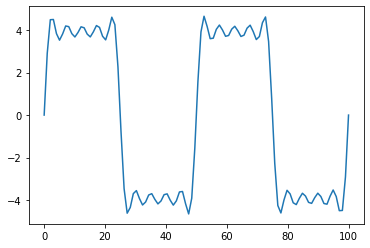

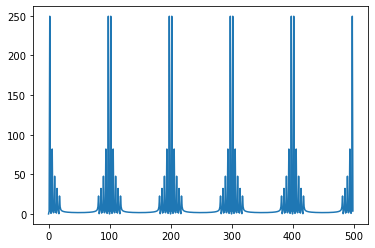

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math


amplitude = 5 # ?
frequency = 2 # Hz
phase = 0 # [x] units

x = np.linspace(start=0, stop=100, num=100)
# y = np.array([amplitude * math.sin(2 * math.pi * frequency * (x_i + phase)) for x_i in x])

num_of_waves = 5
waves = []

for i in range(num_of_waves):
    amplitude_modulation = 1 / (2*i + 1)
    frequency_modulation = (2*i + 1)
    wave = np.array([amplitude_modulation * amplitude * math.sin(frequency_modulation * 2 * math.pi * frequency * (x_i + phase)) for x_i in x])
    waves.append(wave)
    # print(f'Aplitude modulation: {amplitude_modulation}, frequency modulation {frequency_modulation}')
    
y = sum(waves)

plt.plot(x, y)


plt.show()


def fourier_transformation_func(k, clip_samples):
    return sum([clip_samples[n] * math.e ** ((-1)*1j*2*math.pi*n*k / len(clip_samples)) for n in range(len(clip_samples))])


freq_range = range(500)
freq_domain = [np.abs(fourier_transformation_func(freq, y)) for freq in freq_range]
# np.abs() - gives absolute value of the number. If z - complex, |z| = np.abs(z), z = |z|* e^(jQ)

plt.plot(freq_range, freq_domain)
plt.show()

### Gauti rezultatai tiriant sugeneruotą signalą

Su aukčiau pateiktu generatoriumi generavau stačiakampinę bangą (pav. 6) iš 5 skirtingų signalų, o tai yra, 5 skirtingų amplitudžių:

<table>
    <tr>
        <th>
            Signalas laiko domene
        </th>
        <th>
            Signalas dažnio domene
        </th>
        <th>
            Signalas dažnio domene (priartinta)
        </th>
    </tr>
    <tr>
        <td>
            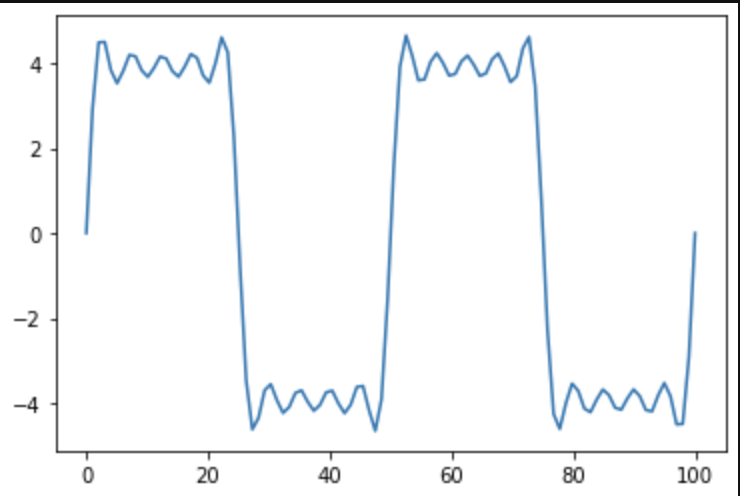
        </td>
        <td>
            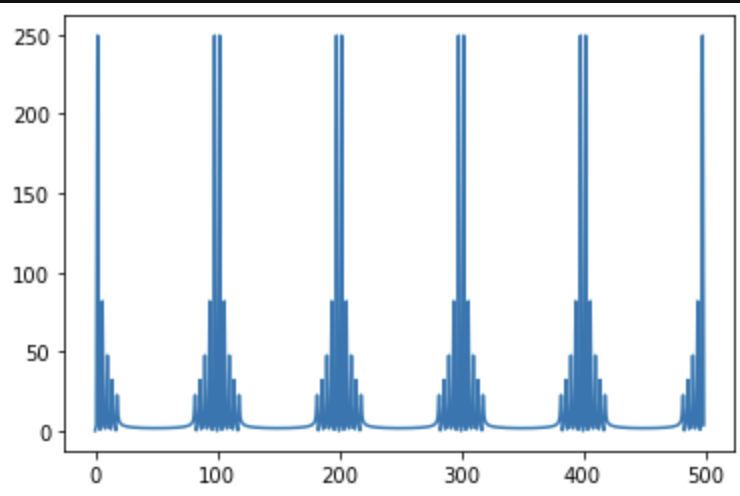
        </td>
        <td>
            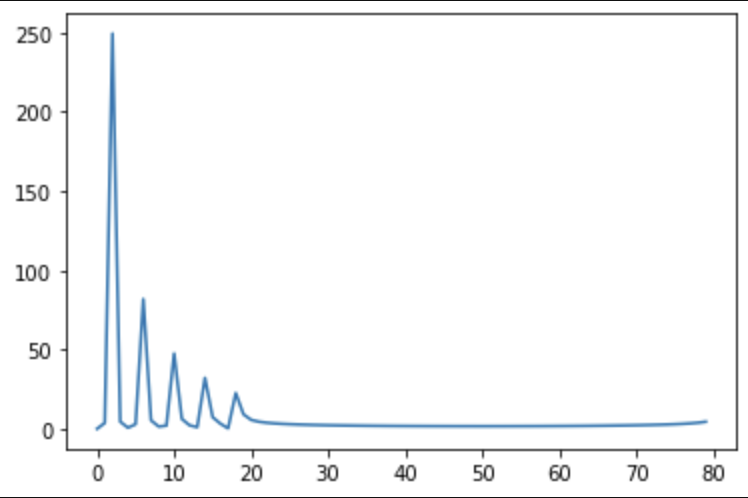
        </td>
    </tr>
    <tr>
        <td>
            pav. 6
        </td>
        <td>
            pav. 7
        </td>
        <td>
            pav. 8
        </td>
    </tr>
</table>

Pritaikyta Furjė transformacija šiai bangai taip pat duoda periodiškumą (kas 100 Hz) ir dažnių 'veidrodinį atspindį' (pav.7), būtent dėl to padariau išvadą, kad klaida dėl atsiradusio periodiškumo kyla iš mano taikomo Furjė transformacijos įgyvendinimo, o ne iš duomenų nuskaitymo ar apdorojimo prieš Furjė transformaciją.

Tačiau prisiartinus dažnio domeno grafiką ir pasižiūrėjus iš ko susideda vienas iš matomų amplitudės reikšmių "stulpų" grafike, galime pamatyti visas penkias pradinę bangą sudarančias amplitudes.

Todėl tęsiau darbą su ankščiau pasirinktais audio įrašais, prisiartinęs grafikų reikšmes:

### Pasirinktų audio įrašų kompozicinė sudėtis

<table>
    <tr>
        <th>Katės miaukimas</th>
        <th>Operos vokalai (Fm, 129bpm)</th>
        <th>Dramblio garsai</th>
    </tr>
    <tr>
        <td>
            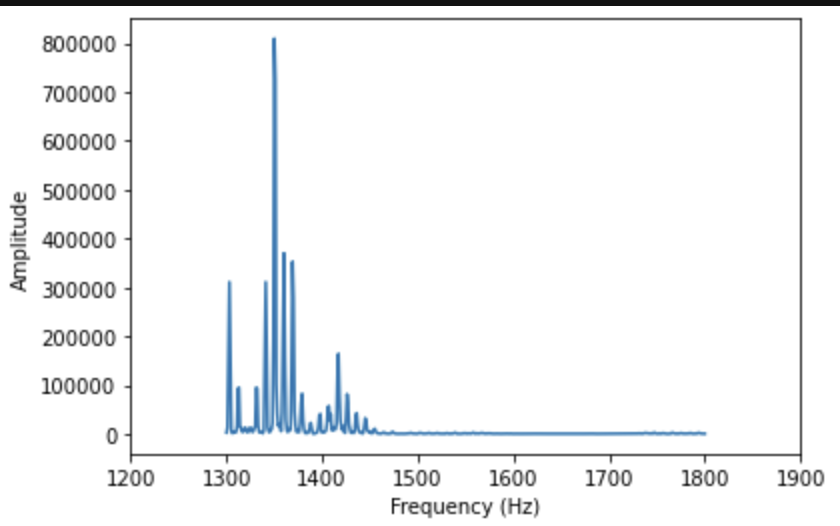
        </td>
        <td>
            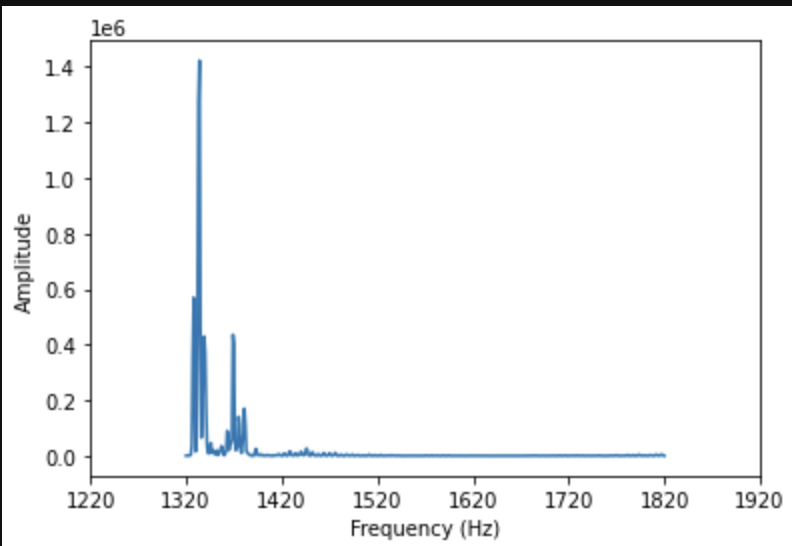
        </td>
        <td>
            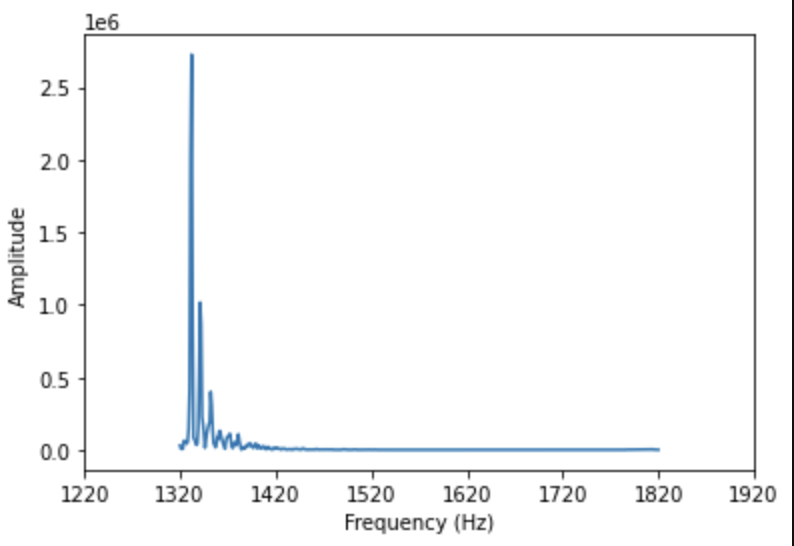
        </td>
    </tr>
    <tr>
        <td>
            pav. 9
        </td>
        <td>
            pav. 10
        </td>
        <td>
            pav. 11
        </td>
    </tr>
</table>

Priartinus dažnio domeno grafikus galime matyti apytiksles pasirinktų signalų sudėtis. Sunku pasakyti, kurio dažnio amplitudė kiekviename iš šių įrašų dominuoja, nes nežinau, kuris amplitudžių klasteris kiekvienam signalui iš atitinkamo jo pilno dažnio domeno grafiko (pav. 1, pav. 2 ir pav 3.) yra tikrasis.

Tačiau šios imties atveju, dominuojančios amplitudės, kiekvienam iš įrašų, priklauso šiems dažniams:

1. Katės miaukimas - ~ 1350 Hz +/- periodiškumas
2. Operos vokalai - ~ 1330 Hz +/- periodiškumas
3. Dramblio garsai - ~ 1325 Hz +/- periodiškumas

Apie kitus šiuos įrašus sudarančius dažnius, šiai konkrečiai imčiai, norėčiau parašyti abstrakčiai - nurodant dažnių intervalą, kuriame galima rasti įrašus sudarančias amplitudes:

1. Katės miaukimas - ~ [1300; 1480] Hz +/- periodiškumas
2. Operos vokalai - ~ [1320; 1480] Hz +/- periodiškumas
3. Dramblio garsai - ~ [1320; 1420] Hz +/- periodiškumas

### Išvada

Manau, užduoties tikslas buvo pasiektas - diskrečiosios Furjė transformacijos pritaikymas tiriant trumpalaikius garso įrašų spektrus ir juos analizuojant. Tačiau atlikus šią užduotį man išlieka šie klausimai:

1. Kaip elgtis su grafikuose matomu periodiškumu?
2. Kaip nustatyti "tikrąjį" audio įrašo amplitudžių klasterį?